## Modelo Auto-Regressivo Sazonal de Média Móveis Integradas (SARIMA)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('fire.csv')
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)
df.sort_index(inplace=True)
df.head()

,state,number
Month,,
1998-01-01,Acre,0.0
1998-01-01,Paraiba,0.0
1998-01-01,Pará,0.0
1998-01-01,Rio,0.0
1998-01-01,Tocantins,0.0


In [5]:
# Filtra o Estado
df1 = df[df.state == 'Amapa']
df1.head()

,state,number
Month,,
1998-01-01,Amapa,0.0
1998-02-01,Amapa,0.0
1998-03-01,Amapa,0.0
1998-04-01,Amapa,0.0
1998-05-01,Amapa,0.0


<AxesSubplot:xlabel='Month'>

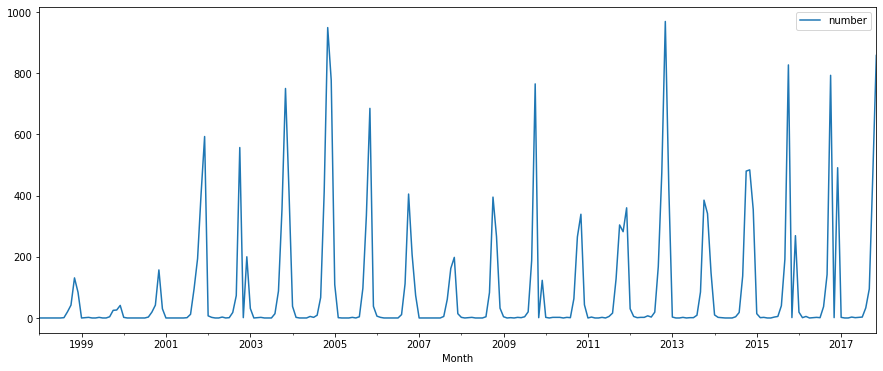

In [23]:
df1.plot(figsize=(15, 6))

<AxesSubplot:xlabel='Month'>

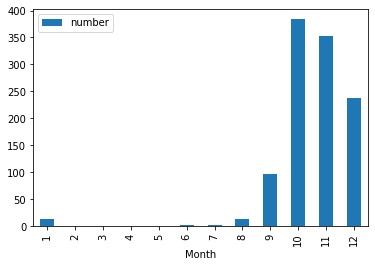

In [9]:
# Agrupa por mês para identificar a sazonalidade
df1.groupby(df1.index.month).mean().plot(kind='bar')

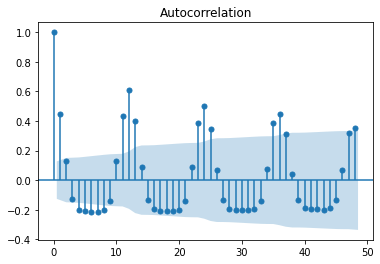

In [12]:
# Autocorrelação
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df1.number, lags=48)
plt.show()

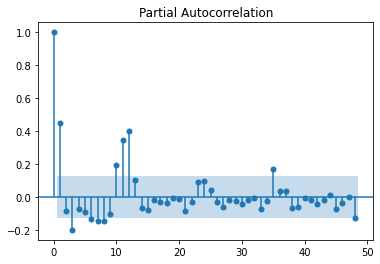

In [13]:
# Autocorrelação parcial
plot_pacf(df1.number, lags=48)
plt.show()

<AxesSubplot:xlabel='Month'>

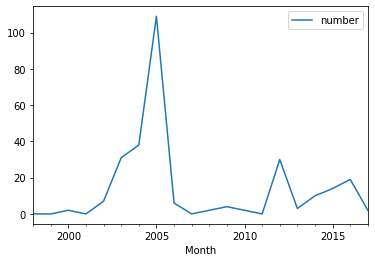

In [15]:
# A série não é estacionária (variância não é constante)
# Devido a isto, vai ter que aplicar o 'D' = 1
df1[df1.index.month == 1].plot()

Month
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

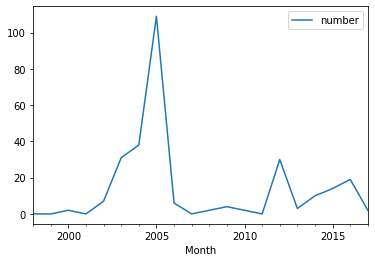

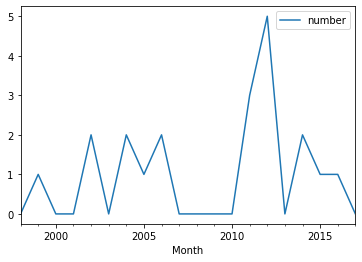

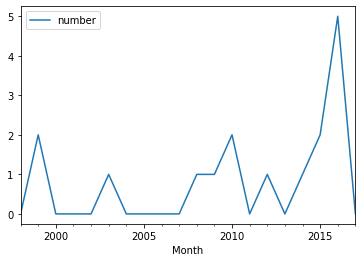

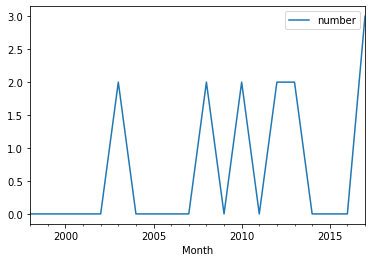

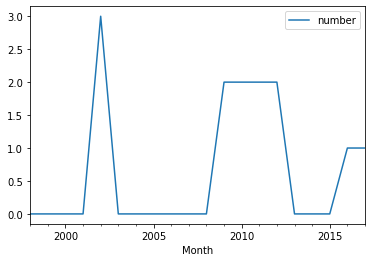

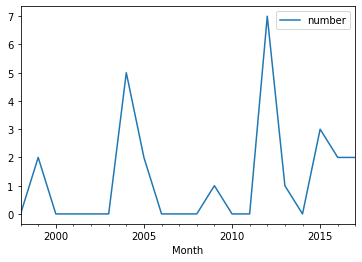

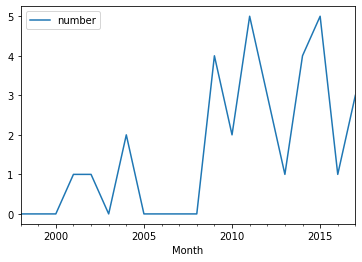

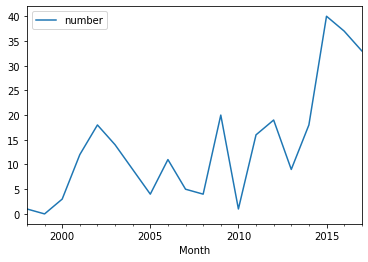

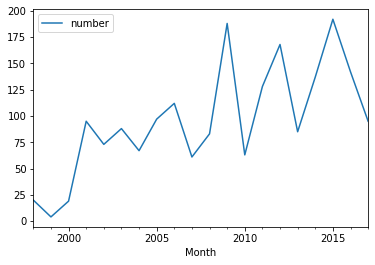

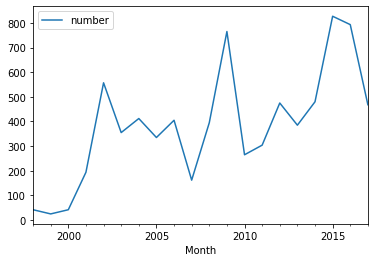

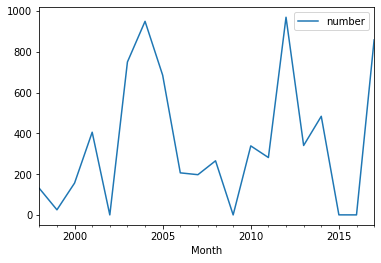

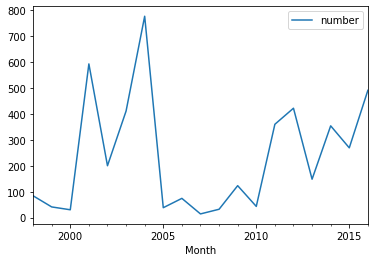

In [17]:
df1.groupby(df1.index.month).plot()

In [24]:
# SARIMA
# Os parâmetros de tendência estarão no parâmetro order=(p, d, q)
# Os parâmetros de sazonalidade estarão no parâmetro seasonal_order=(P, D, Q, s)
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(df1.number, freq='MS', order=(2, 1, 2), seasonal_order=(3, 1, 2, 12)).fit()
(sarima.resid ** 2).mean()

/home/danilo/dev/python/time_series/.time_series/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


16353.825101797798

In [25]:
from statsmodels.tsa.arima_model import ARIMA

arima = ARIMA(df1.number, freq='MS', order=(2, 1, 2)).fit()
(arima.resid ** 2).mean()

26336.94654483597

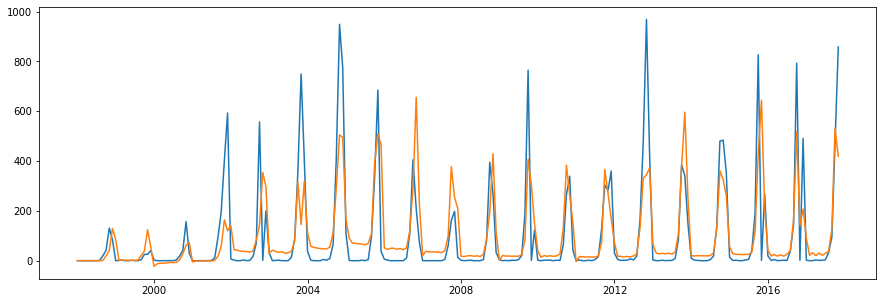

In [26]:
plt.figure(figsize=(15, 5))
plt.plot(df1.number)
plt.plot(sarima.predict(typ='levels'))

In [27]:
df1.index

DatetimeIndex(['1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01',
               ...
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01'],
              dtype='datetime64[ns]', name='Month', length=239, freq=None)

In [32]:
# Previsão para o próximo período
sarima.forecast()[0]

470.709536391353